# Linear Model From Scratch Code

## Simple Linear Regression

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [54]:
# Create synthetic linear dataata
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [55]:
print("First 5 samples of X:", X[:5])
print("First 5 samples of y:", y[:5])

First 5 samples of X: [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]]
First 5 samples of y: [[6.33428778]
 [9.40527849]
 [8.48372443]
 [5.60438199]
 [4.71643995]]


In [56]:
class SimpleLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.w = 0
        self.b = 0

        for _ in range(self.epochs):
            y_pred = self.w * X + self.b
            error = y_pred - y
 
            # Gradients
            dw = (2 / n_samples) * np.dot(X.T, error)
            db = (2 / n_samples) * np.sum(error)

            # Update weights
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return self.w * X + self.b
    def plot(self, X, y):
        plt.scatter(X, y, color='blue', label='Data points')
        plt.plot(X, self.predict(X), color='red', label='Regression line')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Simple Linear Regression')
        plt.legend()
        plt.show()


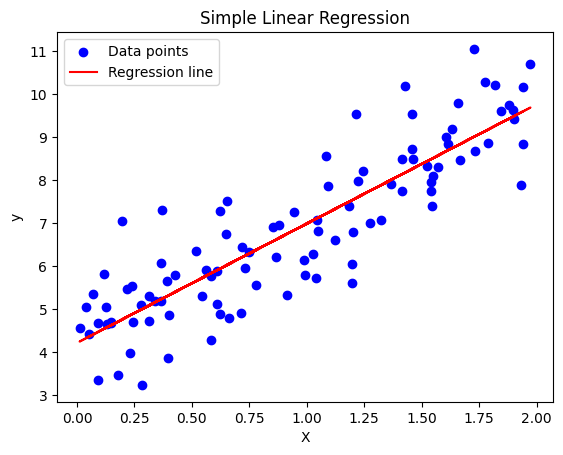

Learned parameters:
Weight (w): [[2.77011339]]
Bias (b): 4.215096157546739


In [57]:
model = SimpleLinearRegression(learning_rate=0.1, epochs=1000)
model.fit(X, y)
y_pred = model.predict(X)

# Plot the results
model.plot(X, y)

print("Learned parameters:")
print("Weight (w):", model.w)
print("Bias (b):", model.b)

In [58]:
# Predict and evaluate
print("MSE:", mean_squared_error(y, y_pred))
print("R2 Score:", r2_score(y, y_pred))

MSE: 0.806584563967053
R2 Score: 0.7692735413614225


## Comparision with Scikit-Learn

In [59]:
sk_model = LinearRegression()
sk_model.fit(X, y)

print(f"Custom Weights: w = {float(model.w.item()):.2f}, b = {float(model.b.item()):.2f}")
print(f"Sklearn Weights: w = {float(sk_model.coef_[0][0]):.2f}, b = {float(sk_model.intercept_[0]):.2f}")

Custom Weights: w = 2.77, b = 4.22
Sklearn Weights: w = 2.77, b = 4.22
